In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/tweets.csv')


In [ ]:
print(df.head())


                   _id         username  \
0  1621600585291014145    realJackEason   
1  1621600584360153088  ManojKu40226010   
2  1621600585358233600       TansyWatts   
3  1621600585391783943    Green_Man1984   
4  1621600586020933632   bruis3pristin3   

                                                text    qScore    nScore  
0  @pansexualflower Criterion certainly have US r...  0.613271  2.934114  
1  🇨🇳 🇺🇸 #China\n#Chinese #Foreign #Ministry said...  0.446642 -2.994406  
2  “As they began to understand the children’s op...  0.609156  1.772004  
3  Excess Deaths Skyrocket Again In England And W...  0.608929 -1.639187  
4  @altgirlalterego scotland, seychelles, syria, ...  0.608089 -0.254614  


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
df

In [ ]:
import statistics

mean = statistics.mean(df['qScore'])
median = statistics.median(df['qScore'])
mode = statistics.mode(df['qScore'])

df['mean_qScore'] = mean
df['median_qScore'] = median
df['mode_qScore'] = mode
print("Mean qScore:", mean)
print("Median qScore:", median)
print("Mode qScore:", mode)


Mean qScore: 0.5968292086674098
Median qScore: 0.6078869047619048
Mode qScore: 0.5701754385964912


In [ ]:
import re
from textblob import TextBlob

# Define a function to count the number of hashtags, mentions and URLs in a tweet
def count_entities(tweet):
    hashtags_final = len(re.findall(r'#\w+', tweet))
    mentions_final = len(re.findall(r'@\w+', tweet))
    urls_final = len(re.findall(r'http\S+', tweet))
    return hashtags_final, mentions_final, urls_final

# Define a function to get the sentiment score of a tweet using TextBlob
def get_sentiment(tweet):
    b= TextBlob(tweet)
    return b.sentiment.polarity

# Apply the functions to the 'text' column of the dataframe and store the results in new columns
df['num_hashtags'], df['num_mentions'], df['num_urls'] = zip(*df['text'].apply(count_entities))
df['sentiment_score'] = df['text'].apply(get_sentiment)


In [ ]:
print(df.describe())


                _id        qScore        nScore   mean_qScore  median_qScore  \
count  1.000100e+04  10001.000000  10001.000000  1.000100e+04   1.000100e+04   
mean   1.621603e+18      0.596829      0.605678  5.968292e-01   6.078869e-01   
std    1.583624e+12      0.055174      1.733462  1.110279e-16   1.110279e-16   
min    1.621601e+18      0.374306     -7.033362  5.968292e-01   6.078869e-01   
25%    1.621602e+18      0.571552      0.000000  5.968292e-01   6.078869e-01   
50%    1.621603e+18      0.607887      0.079807  5.968292e-01   6.078869e-01   
75%    1.621605e+18      0.609435      1.870719  5.968292e-01   6.078869e-01   
max    1.621606e+18      0.820619      5.259908  5.968292e-01   6.078869e-01   

        mode_qScore  num_hashtags  num_mentions      num_urls  sentiment_score  
count  1.000100e+04  10001.000000  10001.000000  10001.000000     10001.000000  
mean   5.701754e-01      0.656734      1.057094      0.481452         0.091193  
std    1.110279e-16      2.085247   

In [ ]:
num_items = len(df)
print("Number of items in the data: ", num_items)


Number of items in the data:  10001


In [ ]:
def preprocess_text(text):
    ListofToken = []

    Newdataset = nlp(text)


    for t in Newdataset:

        if t.text.startswith('@'):
            ListofToken.append(t.text[1:])
        elif t.text.startswith('#'):
            ListofToken.append(t.text[1:])
        elif t.text != '\n':
            ListofToken.append(t.text)
    return ListofToken


In [ ]:
df["tokenise"] = df["text"].apply(preprocess_text)

In [ ]:
print(df.head())



                   _id         username  \
0  1621600585291014145    realJackEason   
1  1621600584360153088  ManojKu40226010   
2  1621600585358233600       TansyWatts   
3  1621600585391783943    Green_Man1984   
4  1621600586020933632   bruis3pristin3   

                                                text    qScore    nScore  \
0  @pansexualflower Criterion certainly have US r...  0.613271  2.934114   
1  🇨🇳 🇺🇸 #China\n#Chinese #Foreign #Ministry said...  0.446642 -2.994406   
2  “As they began to understand the children’s op...  0.609156  1.772004   
3  Excess Deaths Skyrocket Again In England And W...  0.608929 -1.639187   
4  @altgirlalterego scotland, seychelles, syria, ...  0.608089 -0.254614   

   mean_qScore  median_qScore  mode_qScore  num_hashtags  num_mentions  \
0     0.596829       0.607887     0.570175             0             1   
1     0.596829       0.607887     0.570175            16             0   
2     0.596829       0.607887     0.570175             0      

In [ ]:
new_df = pd.DataFrame({'tokenise': df['tokenise']})
print(new_df.head())

                                            tokenise
0  [pansexualflower, Criterion, certainly, have, ...
1  [🇨, 🇳, 🇺, 🇸, , China, , Chinese, , Foreign, , ...
2  [“, As, they, began, to, understand, the, chil...
3  [Excess, Deaths, Skyrocket, Again, In, England...
4  [altgirlalterego, scotland, ,, seychelles, ,, ...


In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def preprocess_token(token):
    # Remove stop words
    if token.is_stop:
        return None

    # Lemmatize the token
    lemma = token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_

    # Remove non-alphabetic characters
    if not lemma.isalpha():
        return None

    return lemma

def preprocess_text(tokens):
    text = ' '.join(tokens)
    i = nlp(text)
    return [preprocess_token(token) for token in i if preprocess_token(token) is not None]



In [ ]:
# Load the tokenized data into a DataFrame
new_df = pd.DataFrame({'tokenise': df['tokenise']})

# Preprocess the tokenized text
new_df["processed_tokenise"] = new_df["tokenise"].apply(preprocess_text)

# Print the head of the DataFrame
print(new_df.head())


                                            tokenise  \
0  [pansexualflower, Criterion, certainly, have, ...   
1  [🇨, 🇳, 🇺, 🇸, , China, , Chinese, , Foreign, , ...   
2  [“, As, they, began, to, understand, the, chil...   
3  [Excess, Deaths, Skyrocket, Again, In, England...   
4  [altgirlalterego, scotland, ,, seychelles, ,, ...   

                                  processed_tokenise  
0  [pansexualflower, criterion, certainly, right,...  
1  [china, chinese, foreign, ministry, say, weath...  
2  [begin, understand, child, operational, scheme...  
3  [excess, deaths, skyrocket, england, wales, de...  
4  [altgirlalterego, scotland, seychelle, syria, ...  


In [ ]:
new_df

processed_tokenise
0      [pansexualflower, criterion, certainly, right,...
1      [china, chinese, foreign, ministry, say, weath...
2      [begin, understand, child, operational, scheme...
3      [excess, deaths, skyrocket, england, wales, de...
4      [altgirlalterego, scotland, seychelle, syria, ...
...                                                  ...
9996   [people, literally, get, mad, yellabeezy, say,...
9997   [cannabis, marijuana, thc, cannabiscommunity, ...
9998   [jerzy, skolimowski, surreal, donkey, drama, e...
9999                 [shaneeditor, like, edit, wise, uk]
10000  [armstrong, sophia, york, stuart, athena, symo...

[10001 rows x 1 columns]

In [ ]:
new_df = new_df.drop(columns=['tokenise'])


In [ ]:
new_df

processed_tokenise
0      [pansexualflower, criterion, certainly, right,...
1      [china, chinese, foreign, ministry, say, weath...
2      [begin, understand, child, operational, scheme...
3      [excess, deaths, skyrocket, england, wales, de...
4      [altgirlalterego, scotland, seychelle, syria, ...
...                                                  ...
9996   [people, literally, get, mad, yellabeezy, say,...
9997   [cannabis, marijuana, thc, cannabiscommunity, ...
9998   [jerzy, skolimowski, surreal, donkey, drama, e...
9999                 [shaneeditor, like, edit, wise, uk]
10000  [armstrong, sophia, york, stuart, athena, symo...

[10001 rows x 1 columns]

In [ ]:
# Calculate the number of tweets
num_tweets = len(new_df)

# Calculate the minimum and maximum length of tweets
min_len = new_df['processed_tokenise'].apply(len).min()
max_len = new_df['processed_tokenise'].apply(len).max()

# Calculate the average length of tweets
avg_len = new_df['processed_tokenise'].apply(len).mean()

# Print the results
print(f"Number of tweets: {num_tweets}")
print(f"Minimum tweet length: {min_len}")
print(f"Maximum tweet length: {max_len}")
print(f"Average tweet length: {avg_len}")


Number of tweets: 10001
Minimum tweet length: 1
Maximum tweet length: 46
Average tweet length: 12.13138686131387


In [ ]:
new_df.describe()

processed_tokenise
count                                               10001
unique                                               9618
top     [happy, birthday, bibi, aseefa, bhutto, zardar...
freq                                                   21

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert preprocessed text into a document-term matrix
cv = CountVectorizer(tokenizer=lambda i: i, lowercase=False)
dtm = cv.fit_transform(new_df['processed_tokenise'])


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
dtm

<10001x22936 sparse matrix of type '<class 'numpy.int64'>'
	with 115192 stored elements in Compressed Sparse Row format>

In [ ]:
# Print the top 10 most important words for each topic
for i, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(i, topic))


Topic: 0 
Words: 0.012*"london" + 0.009*"uk" + 0.006*"m" + 0.005*"man" + 0.005*"year" + 0.005*"like" + 0.004*"know" + 0.004*"new" + 0.004*"good" + 0.004*"go"
Topic: 1 
Words: 0.014*"uk" + 0.006*"like" + 0.005*"people" + 0.005*"time" + 0.005*"need" + 0.004*"think" + 0.004*"labour" + 0.004*"london" + 0.004*"ticket" + 0.004*"pay"
Topic: 2 
Words: 0.098*"york" + 0.094*"stuart" + 0.094*"armstrong" + 0.094*"sophia" + 0.094*"jared" + 0.094*"athena" + 0.094*"symon" + 0.094*"spender" + 0.001*"power" + 0.001*"ali"
Topic: 3 
Words: 0.024*"new" + 0.016*"york" + 0.007*"vs" + 0.006*"city" + 0.005*"england" + 0.005*"labour" + 0.004*"vote" + 0.004*"school" + 0.004*"high" + 0.003*"party"
Topic: 4 
Words: 0.011*"uk" + 0.007*"amp" + 0.006*"boris" + 0.005*"good" + 0.004*"look" + 0.004*"conservative" + 0.004*"m" + 0.004*"labour" + 0.004*"work" + 0.004*"like"


In [ ]:
import gensim
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

# Create a dictionary from the preprocessed tokenized data
dictionary = corpora.Dictionary(new_df["processed_tokenise"])

# Convert the dictionary into a bag-of-words corpus
Dataset_new = [dictionary.doc2bow(tokens) for tokens in new_df["processed_tokenise"]]


In [ ]:

# Train a topic model (LDA) on the corpus
lda_model_new = models.LdaModel(corpus=Dataset_new,
                            id2word=dictionary,
                            num_topics=10,
                            passes=10,
                            alpha='auto')

# Determine the optimal number of topics to use
score_coherence = []
score_kld = []
Score_per = []

for i in range(2, 11):
    model_train_LDA = models.LdaModel(corpus=Dataset_new,
                                id2word=dictionary,
                                num_topics=i,
                                passes=10,
                                alpha='auto')

    # Calculate coherence score
    Model_coherence = CoherenceModel(model=model_train_LDA, texts=new_df["processed_tokenise"], dictionary=dictionary, coherence='c_v')
    Model_coherence_lda_new = Model_coherence.get_coherence()

    # Calculate KLD score
    model_KLD = lda_model_new.log_perplexity(Dataset_new)

    # Calculate perplexity score
    perplexity_lda_new = 2 ** (-lda_model_new.log_perplexity(Dataset_new))

    score_coherence.append(Model_coherence_lda_new)
    score_kld.append(model_KLD)
    Score_per.append(perplexity_lda_new)

    print(f"Number of topics: {i}. Coherence Score: {Model_coherence_lda_new:.4f}. KLD Score: {model_KLD:.4f}. Perplexity: {perplexity_lda_new:.4f}")

# Choose the topic model with the highest coherence score
optimal_no_topics = score_coherence.index(max(score_coherence)) + 2
model_train_LDA = models.LdaModel(corpus=Dataset_new,
                            id2word=dictionary,
                            num_topics=optimal_no_topics,
                            passes=10,
                            alpha='auto')

# Extract the topics
topics = model_train_LDA.show_topics(num_topics=-1, formatted=False)
for topic in topics:
    print(f"Topic #{topic[0]}: {' '.join([word[0] for word in topic[1]])}")


Number of topics: 2. Coherence Score: 0.2202. KLD Score: -9.2610. Perplexity: 613.5143
Number of topics: 3. Coherence Score: 0.2076. KLD Score: -9.2609. Perplexity: 613.5036
Number of topics: 4. Coherence Score: 0.2507. KLD Score: -9.2609. Perplexity: 613.4945
Number of topics: 5. Coherence Score: 0.2660. KLD Score: -9.2609. Perplexity: 613.5035
Number of topics: 6. Coherence Score: 0.2711. KLD Score: -9.2609. Perplexity: 613.4984
Number of topics: 7. Coherence Score: 0.2608. KLD Score: -9.2610. Perplexity: 613.4808
Number of topics: 8. Coherence Score: 0.3425. KLD Score: -9.2609. Perplexity: 613.4945
Number of topics: 9. Coherence Score: 0.3060. KLD Score: -9.2609. Perplexity: 613.4920
Number of topics: 10. Coherence Score: 0.3116. KLD Score: -9.2609. Perplexity: 613.4960
Topic #0: new london york flight uk racing airport company link balloon
Topic #1: uk labour people conservative think go like good right say
Topic #2: york stuart armstrong sophia symon athena spender jared oil fee
T

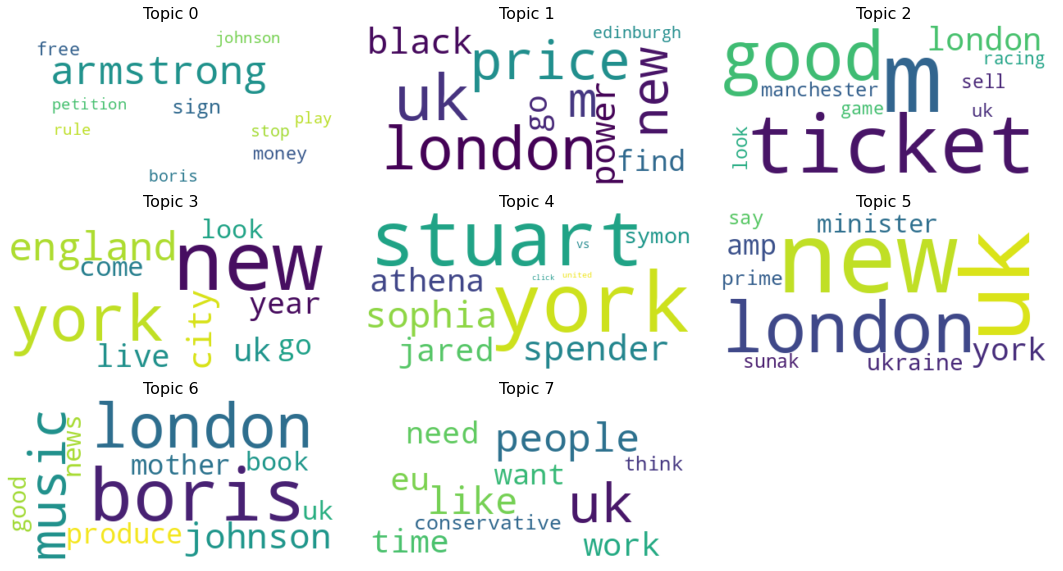

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define function to plot wordclouds
def plot_wordclouds(lda_model_new, num_topics, figsize=(20,10), cols=5):
    # Set figure size and number of rows
    Number_of_rows = int(num_topics / cols) + 1
    fig, axes = plt.subplots(Number_of_rows, cols, figsize=figsize, sharex=True, sharey=True)

    # Generate wordclouds for each topic
    for i, ax in enumerate(axes.flatten()):
        if i < num_topics:
            # Get topic and word weights
            topic = lda_model_new.show_topic(i)
            word_weights = dict(topic)

            # Create wordcloud
            wordcloud= WordCloud(background_color="white", max_words=50, width=400, height=200)
            wordcloud.generate_from_frequencies(word_weights)

            # Plot wordcloud
            ax.imshow(wordcloud, interpolation="bilinear")
            ax.set_title(f"Topic {i}", fontsize=16)
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Plot wordclouds for the optimal number of topics
plot_wordclouds(lda_model_new, optimal_no_topics, figsize=(15,8), cols=3)


In [ ]:
def topic_words(topicid, n=7):
    top_words_tweets= [(word, probabilithy) for word, probabilithy in lda_model_new.show_topic(topicid)]
    bottom_words_tweets = [(word, probabilithy) for word, probabilithy in reversed(top_words_tweets)]
    return top_words_tweets[:n], bottom_words_tweets[:n]

In [ ]:
list_top = list(range(lda_model_new.num_topics))

# Create a dictionary to store the top and bottom words for each topic
Top_Bot_dict = {}

# Loop through each topic and get the top and bottom words
for id in list_top:
    top_words_tweets, bottom_words_tweets = topic_words(id, n=7)
    Top_Bot_dict[f"Topic {id} (top)"] = [word for word, probabilithy in top_words_tweets]
    Top_Bot_dict[f"Topic {id} (bottom)"] = [word for word, probabilithy in bottom_words_tweets]

# Create a DataFrame from the topics_dict
topics_t_B_df = pd.DataFrame.from_dict(Top_Bot_dict)

# Display the table
display(topics_t_B_df)

Topic 0 (top) Topic 0 (bottom) Topic 1 (top) Topic 1 (bottom) Topic 2 (top)  \
0     armstrong             play            uk        edinburgh             m   
1          sign         petition        london             find        ticket   
2          free          johnson         price               go          good   
3         money             rule           new            power        london   
4         boris             stop             m            black    manchester   
5          stop            boris         black                m          look   
6          rule            money         power              new          sell   

  Topic 2 (bottom) Topic 3 (top) Topic 3 (bottom) Topic 4 (top)  \
0           racing           new             look          york   
1               uk          york             come        stuart   
2             game       england               go        sophia   
3             sell          city             year       spender   
4             look            uk             live         jared   
5       manchester          live               uk        athena   
6           london          year             city         symon   

  Topic 4 (bottom) Topic 5 (top) Topic 5 (bottom) Topic 6 (top)  \
0            click           new            sunak         boris   
1           united            uk              say        london   
2               vs        london            prime         music   
3            symon          york          ukraine       johnson   
4           athena           amp         minister       produce   
5            jared      minister              amp        mother   
6          spender       ukraine             york          book   

  Topic 6 (bottom) Topic 7 (top) Topic 7 (bottom) Topic 8 (top)  \
0             good            uk            think        labour   
1               uk        people     conservative         party   
2             news          like             want          vote   
3             book          time             need  conservative   
4           mother            eu             work        people   
5          produce          work               eu          tory   
6          johnson          need             time            mp   

  Topic 8 (bottom) Topic 9 (top) Topic 9 (bottom)  
0             lose         wales            serve  
1           tories       ireland             rest  
2    conservatives           amp              set  
3               mp      scotland             book  
4             tory           man            story  
5           people         story              man  
6     conservative          book         scotland

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/groupedTweets.csv')


In [ ]:
import re
from textblob import TextBlob

# Define a function to count the number of hashtags, mentions and URLs in a tweet
def count_func(tweet1):
    hashtags = len(re.findall(r'#\w+', tweet1))
    mentions = len(re.findall(r'@\w+', tweet1))
    urls = len(re.findall(r'http\S+', tweet1))
    return hashtags, mentions, urls

# Define a function to get the sentiment score of a tweet using TextBlob
def sentiment(tweet1):
    blob = TextBlob(tweet1)
    return blob.sentiment.polarity

# Apply the functions to the 'text' column of the dataframe and store the results in new columns
df1['num_hashtags'], df1['num_mentions'], df1['num_urls'] = zip(*df1['text'].apply(count_func))
df1['sentiment_score'] = df1['text'].apply(sentiment)


In [ ]:
df1

group              tweetID         username  \
0         0  1621600585291014145    realJackEason   
1         0  1621600597127331842           battez   
2         0  1621600609030782981     Reno_station   
3         0  1621600638256693252      pedrinho_uk   
4         0  1621600792812609541   ClimateSchmidt   
...     ...                  ...              ...   
9963    466  1621606007179812864    Quattro091275   
9964    467  1621606023466258433          iansltx   
9965    468  1621606075605680130  TheMooreOfNewry   
9966    469  1621606081884463106         athpaps7   
9967    470  1621606095763509254    faces_of_jeff   

                                                   text    qScore    nScore  \
0     @pansexualflower Criterion certainly have US r...  0.613271  2.934114   
1     @StratAnalytica @EconguyRosie yeah I'm in UK j...  0.603617  1.712620   
2     @NappaBald66 Dry clean eraser should do the tr...  0.669598  3.165340   
3     @alanvibe @DrHoenderkamp @haringeycouncil @mik...  0.543737  3.485828   
4     @PGDynes Climate change is a real problem, but...  0.609599  1.870719   
...                                                 ...       ...       ...   
9963  @whiskytip @TheWhiskyNovice @BimberLondon Very...  0.569231  0.000000   
9964  So this means that in 2026 there'll be Ford vs...  0.607426  0.000000   
9965  Should be no fucking split about it. Terminate...  0.607125  1.180456   
9966  How is Graham Potter starting havertz over Aub...  0.607810  1.712620   
9967  @WhenIsBirths In an arrangement by Michael Jac...  0.616780  3.165340   

      num_hashtags  num_mentions  num_urls  sentiment_score  
0                0             1         0         0.006797  
1                0             2         0         0.000000  
2                0             1         0        -0.133333  
3                0             5         1        -0.125000  
4                0             1         1        -0.100000  
...            ...           ...       ...              ...  
9963             0             3         0         0.455000  
9964             0             0         0         0.000000  
9965             0             0         0         0.300000  
9966             0             0         0         0.000000  
9967             0             1         0         0.000000  

[9968 rows x 10 columns]

In [ ]:
df1.describe()

group       tweetID       qScore       nScore  num_hashtags  \
count  9968.000000  9.968000e+03  9968.000000  9968.000000   9968.000000   
mean     85.552769  1.621603e+18     0.596870     0.608089      0.657705   
std      92.975854  1.578024e+12     0.055180     1.732554      2.088012   
min       0.000000  1.621601e+18     0.374306    -7.033362      0.000000   
25%      16.000000  1.621602e+18     0.571552     0.000000      0.000000   
50%      48.000000  1.621603e+18     0.607887     0.079807      0.000000   
75%     119.000000  1.621605e+18     0.609435     1.870719      0.000000   
max     470.000000  1.621606e+18     0.820619     5.259908     28.000000   

       num_mentions     num_urls  sentiment_score  
count   9968.000000  9968.000000      9968.000000  
mean       1.056481     0.481742         0.091129  
std        2.227891     0.668988         0.274627  
min        0.000000     0.000000        -1.000000  
25%        0.000000     0.000000         0.000000  
50%        1.000000     0.000000         0.000000  
75%        1.000000     1.000000         0.208333  
max       50.000000     8.000000         1.000000

In [ ]:
import pandas as pd
import nltk
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
import demoji
# Group the tweets by cluster and concatenate the text
groupd_dataset = df1.groupby('group')['text'].apply(lambda x: ' '.join(x)).values


# Preprocess the documents
Final_dataset = []
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.add("https")  # Add http to the stop words set
demoji.download_codes()  # Download the emoji codes

for i in groupd_dataset:
    # Remove emojis from the text
    i = demoji.replace(i, '')

    # Tokenize the text
    tokenized_texts = nltk.word_tokenize(i.lower())

    # Remove stop words, words with length <= 3, and "http"
    tokenized_texts = [word for word in tokenized_texts if word not in stop_words and len(word) > 3]

    # Stem the words
    toekns_Stemmed = nltk.stem.porter.PorterStemmer()
    tokenized_texts = [toekns_Stemmed.stem(word) for word in tokenized_texts]

    Final_dataset.append(tokenized_texts)



<ipython-input-65-23b7a07ee23d>:16: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()  # Download the emoji codes


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Create a dictionary and a corpus
vocabulary = Dictionary(Final_dataset)
Dataset = [dictionary.doc2bow(doc) for doc in Final_dataset]

# Train an LDA model for a range of topic numbers
min_topics = 5
max_topics = 30
step_size = 5

Score_coherence_grouped = []
Scores_KLD_grouped = []
Scores_perplexity_grouped = []


In [ ]:
# Train an LDA model for a range of topic numbers
min_topics = 5
max_topics = 30
step_size = 5

Score_coherence_grouped = []
Scores_KLD_grouped = []
Scores_perplexity_grouped = []

for num_topics in range(min_topics, max_topics+1, step_size):
    Model_grouped = LdaModel(Dataset, id2word=dictionary, num_topics=num_topics, passes=10)
    coherence_model = CoherenceModel(model=Model_grouped, texts=Final_dataset, dictionary=dictionary, coherence='c_v')
    score_coherence = coherence_model.get_coherence()
    Score_coherence_grouped.append(score_coherence)

    # Calculate Kullback-Leibler Divergence (KLD) score
    score_kld = Model_grouped.log_perplexity(Dataset)
    Scores_KLD_grouped.append(score_kld)

    # Calculate Perplexity score
    score_perplexity = np.exp2(-Model_grouped.log_perplexity(Dataset))
    Scores_perplexity_grouped.append(score_perplexity)


In [ ]:
# Print the scores
print('Coherence scores:', Score_coherence_grouped)
print('KLD scores:', Scores_KLD_grouped)
print('Perplexity scores:', Scores_perplexity_grouped)

# Find the best number of topics based on the highest average score
avg_scores = np.mean([Score_coherence_grouped, Scores_KLD_grouped, Scores_perplexity_grouped], axis=0)
best_num_topics = min_topics + step_size * np.argmax(avg_scores)
print('Best number of topics:', best_num_topics)

# Train an LDA model with the best number of topics
best_lda_model = LdaModel(Dataset, id2word=dictionary, num_topics=best_num_topics, passes=10)

# Print the resultant topics
print('Resultant topics:')
topics = best_lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


Coherence scores: [0.24526447184259564, 0.3434204998610327, 0.39225821664010113, 0.3590172948089944, 0.37417859260383307, 0.35110765478248]
KLD scores: [-8.33646194628123, -8.334833539854056, -8.318303288237978, -8.376355789218767, -8.389768167400405, -8.391242454467179]
Perplexity scores: [323.24165868424245, 322.8738968999075, 319.1945536071729, 332.29758313659903, 335.4068301151687, 335.7501191325569]
Best number of topics: 30
Resultant topics:
(23, '0.045*"game" + 0.019*"glasgow" + 0.013*"move" + 0.005*"team" + 0.004*"live" + 0.004*"tomorrow" + 0.004*"home" + 0.003*"fan" + 0.003*"unit" + 0.003*"join"')
(0, '0.053*"born" + 0.031*"rest" + 0.028*"book" + 0.028*"human" + 0.028*"link" + 0.027*"live" + 0.026*"antiwork" + 0.026*"lab" + 0.026*"mother" + 0.026*"hell"')
(22, '0.083*"york" + 0.009*"time" + 0.009*"school" + 0.008*"high" + 0.008*"link" + 0.007*"date" + 0.007*"click" + 0.007*"livestream" + 0.007*"england" + 0.005*"state"')
(27, '0.040*"great" + 0.009*"sport" + 0.009*"gift" + 0.0

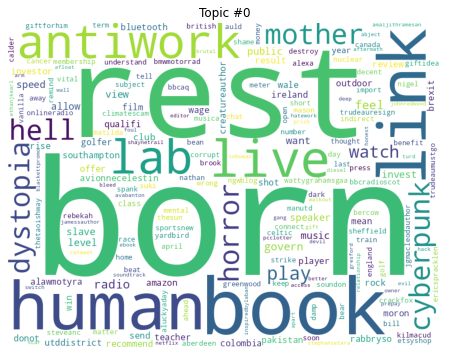

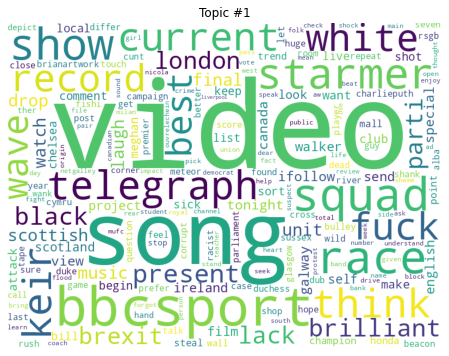

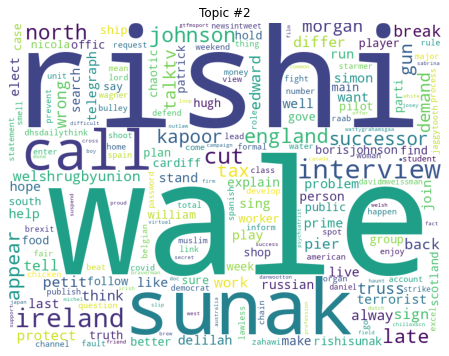

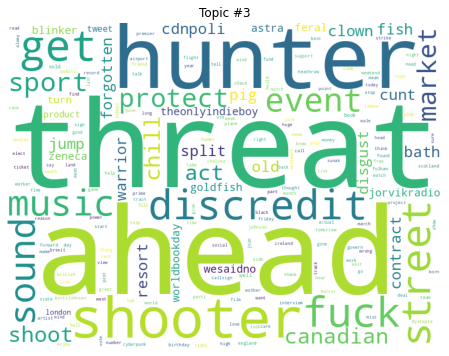

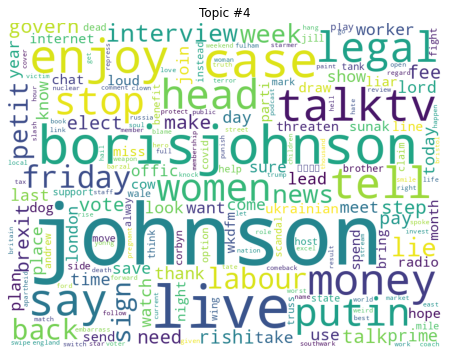

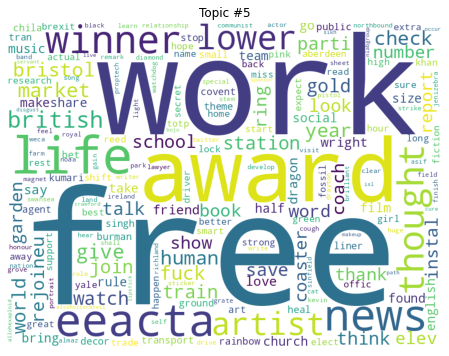

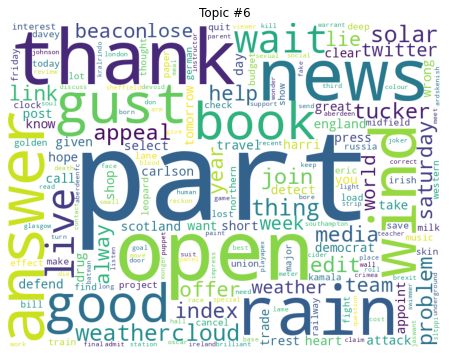

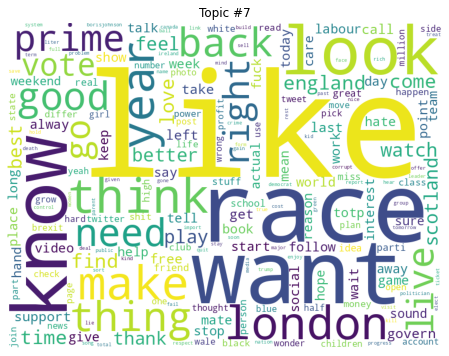

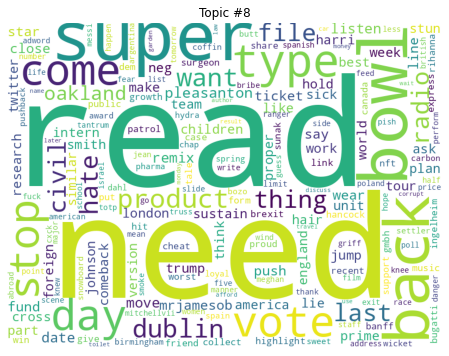

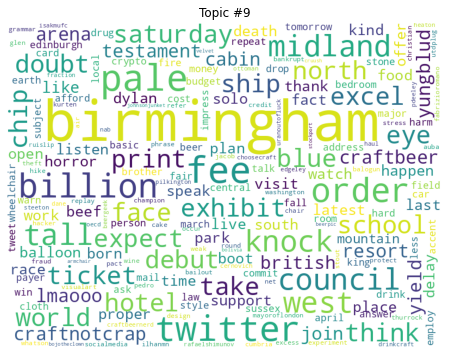

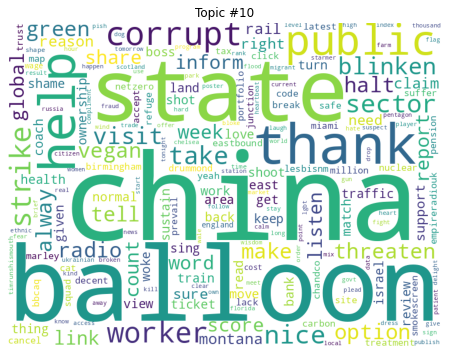

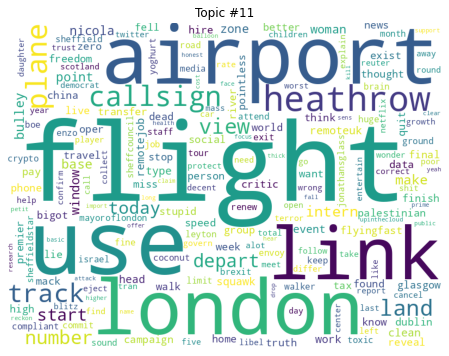

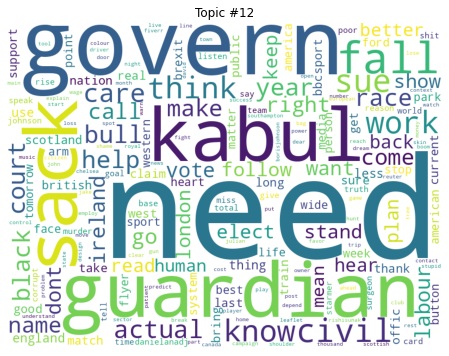

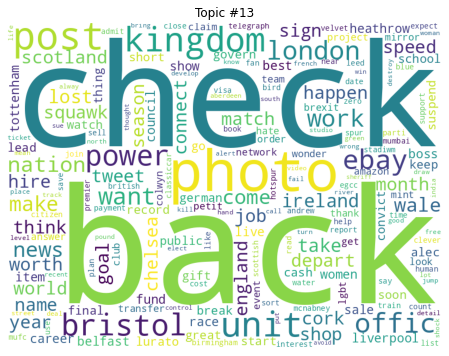

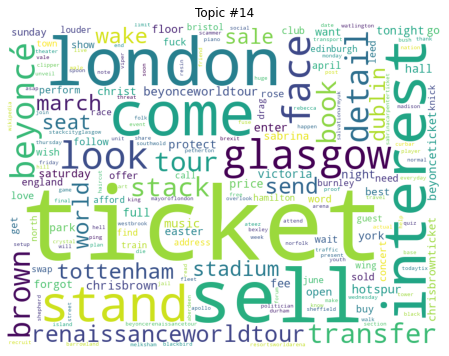

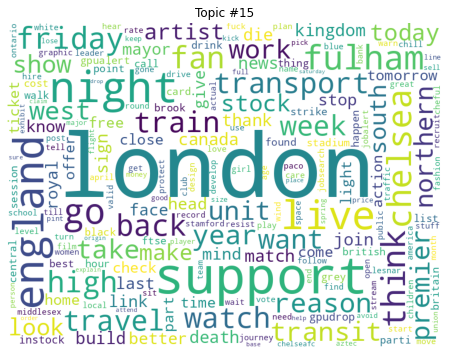

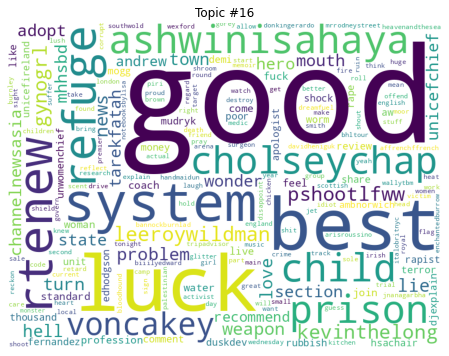

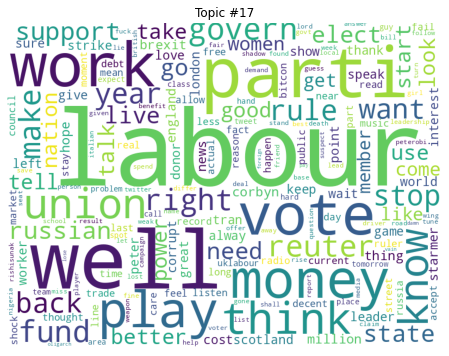

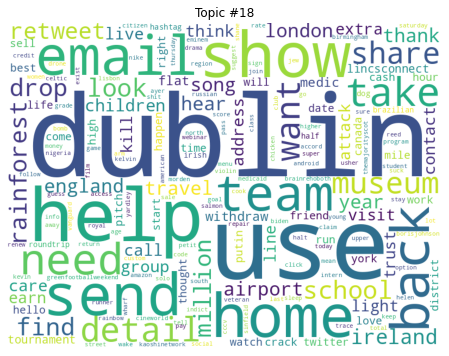

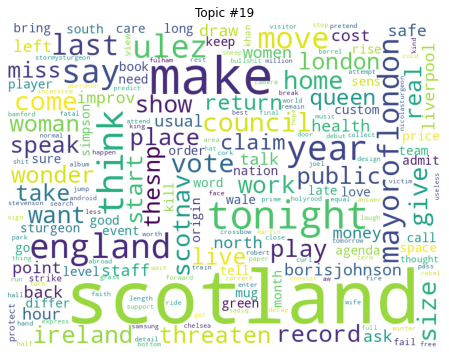

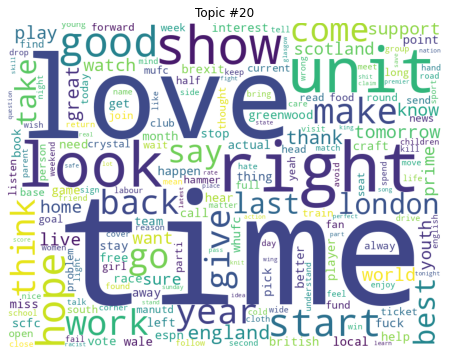

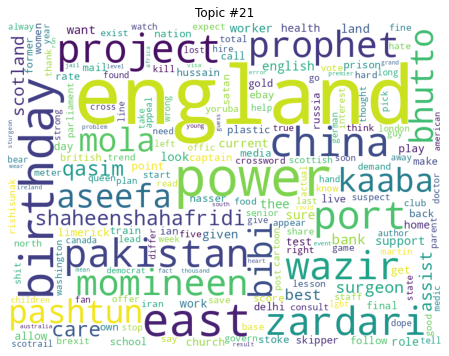

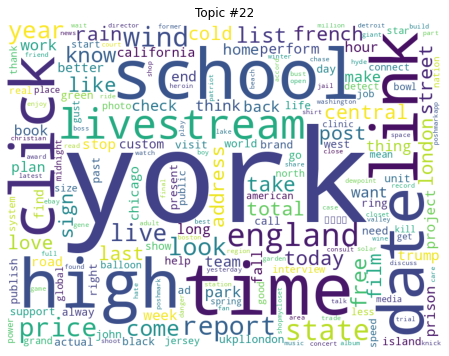

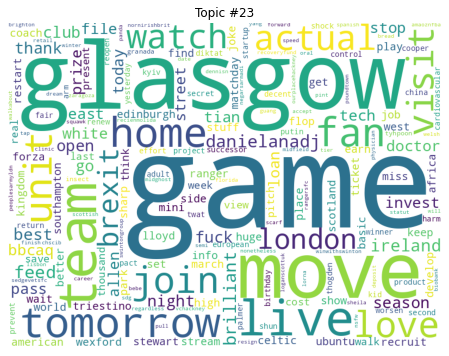

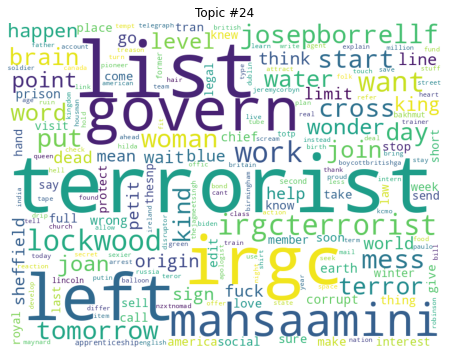

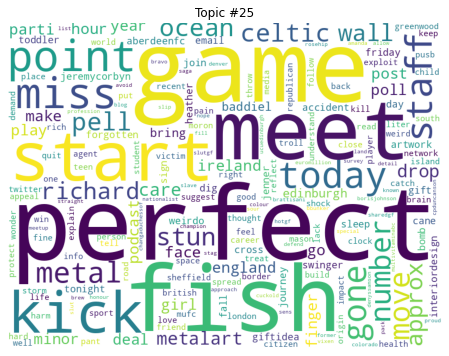

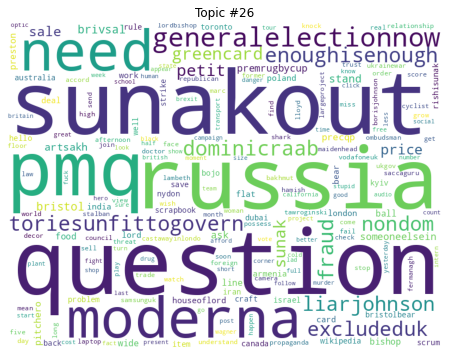

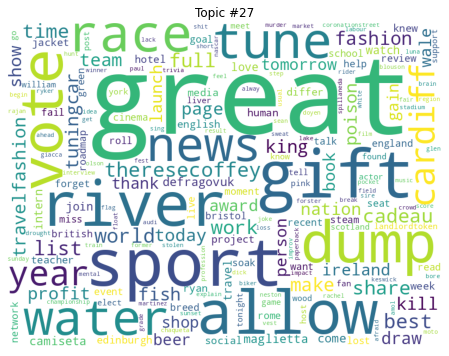

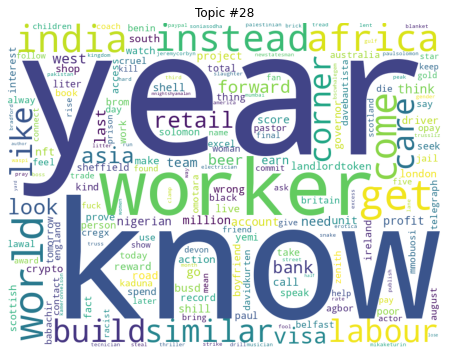

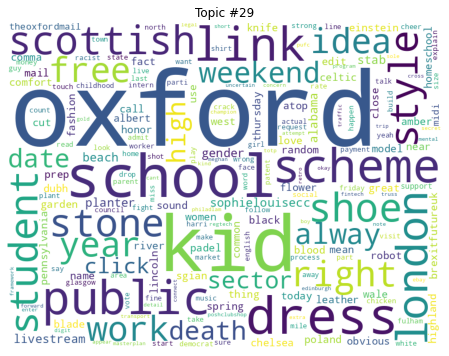

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud for each topic
for i in range(best_num_topics):
    plt.figure(figsize=(8, 6))
    wordcloud2 = WordCloud(background_color='white', max_words=200, width=800, height=600)
    plt.imshow(wordcloud2.fit_words(dict(best_lda_model.show_topic(i, 200))))
    plt.axis('off')
    plt.title('Topic #{}'.format(i))
    plt.show()



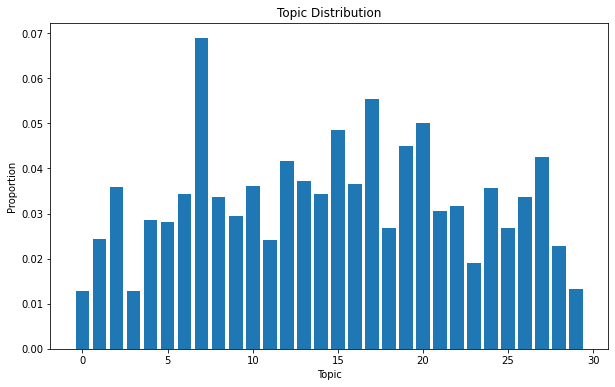

In [ ]:
# Generate a bar chart showing the topic distribution of the documents
topic_distribution = np.zeros(best_num_topics)
for doc in Dataset:
    topics = best_lda_model.get_document_topics(doc, minimum_probability=0)
    for topic in topics:
        topic_distribution[topic[0]] += topic[1]

plt.figure(figsize=(10, 6))
plt.bar(range(best_num_topics), topic_distribution / sum(topic_distribution))
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.title('Topic Distribution')
plt.show()


In [ ]:
# Grouped model metrics
coherence_grouped_g = [0.24526447184259564, 0.3434204998610327, 0.39225821664010113, 0.3590172948089944, 0.37417859260383307, 0.35110765478248]
kld_grouped_g = [-8.33646194628123, -8.334833539854056, -8.318303288237978, -8.376355789218767, -8.389768167400405, -8.391242454467179]
perplexity_grouped_g = [323.24165868424245, 322.8738968999075, 319.1945536071729, 332.29758313659903, 335.4068301151687, 335.7501191325569]

# Single model metrics
coherence_single_g = [0.2202, 0.2076, 0.2507, 0.266, 0.2711, 0.2608, 0.3425, 0.306, 0.3116]
kld_single_g = [-9.2610, -9.2609, -9.2609, -9.2609, -9.2609, -9.2610, -9.2609, -9.2609, -9.2609]
perplexity_single_g = [613.5143, 613.5036, 613.4945, 613.5035, 613.4984, 613.4808, 613.4945, 613.4920, 613.4960]


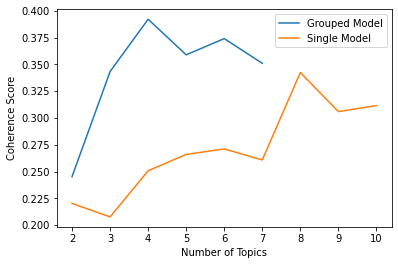

In [ ]:
#Plot coherence scores
plt.plot(range(2, 8), coherence_grouped_g, label='Grouped Model')
plt.plot(range(2, 11), coherence_single_g, label='Single Model')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend()
plt.show()

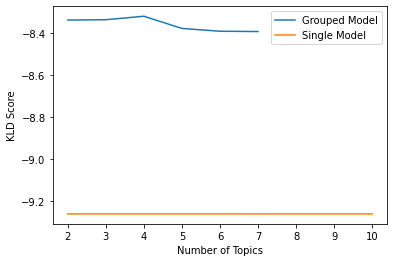

In [ ]:
# Plot KLD scores
plt.plot(range(2, 8), kld_grouped_g, label='Grouped Model')
plt.plot(range(2, 11), kld_single_g, label='Single Model')
plt.xlabel('Number of Topics')
plt.ylabel('KLD Score')
plt.legend()
plt.show()

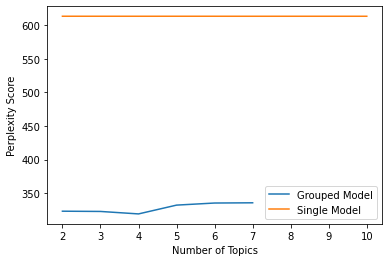

In [ ]:
# Plot perplexity scores
plt.plot(range(2, 8), perplexity_grouped_g, label='Grouped Model')
plt.plot(range(2, 11), perplexity_single_g, label='Single Model')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.legend()
plt.show()